In [ ]:
pip install stc

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

from stc import SparseTensorClassifier

from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score

# **Import datasets**

In [ ]:
# Import the datasets previously produced containing BOW or other information
# about the data to elaborate.
# Each dataset containg a particular category of data retrived.

# Import list of the sentences in the test set.
print('\nImport test_set_sentence_only_claim_or_only_premise.csv\n')
upload = files.upload()

# Import the labels of the sentences to classify.
print('\nImport claim_premise_labels.csv\n')
upload = files.upload()

# Import the statistics and positions information of the sentences to classify.
print('\nImport claim_premise_statistic.csv\n')
upload = files.upload()

# Import the BOW of the POS of the sentences to classify.
print('\nImport claim_premise_POS.csv\n')
upload = files.upload()

# Import the BOW of the simplyfied POS of the sentences to classify.
print('\nImport claim_premise_simple_POS.csv\n')
upload = files.upload()

# Import the BOW for the bigrams of the POS of the sentences to classify.
print('\nImport claim_premise_bigram_POS.csv\n')
upload = files.upload()

# Import the BOW for the bigrams of the simplyfied POS of the sentences to classify.
print('\nImport claim_premise_bigram_simple_POS.csv\n')
upload = files.upload()

# Import the BOW of the dependency tag of the sentences to classify.
print('\nImport claim_premise_dependency.csv\n')
upload = files.upload()

# Import the statistic relative to the tree of the dependency tag of the sentences to classify.
print('\nImport claim_premise_dependency_tree_stat.csv\n')
upload = files.upload()

# Import the BOW of the labeled named entity of the sentences to classify.
print('\nImport claim_premise_named_entity_BOW.csv\n')
upload = files.upload()

# Import the BOW of the sentences to classify.
print('\nImport claim_premise_BOW.csv\n')
upload = files.upload()

# Import the BOW for the bigrams of the sentences to classify.
print('\nImport claim_premise_Bigram.csv\n')
upload = files.upload()

# Import the BOW for secific n-grams of the sentences to classify.
print('\nImport claim_premise_BOW_appendix_words.csv\n')
upload = files.upload()

# Import the remaining statistics of the sentences to classify.
print('\nImport claim_premise_remaining_stat.csv\n')
upload = files.upload()


Import test_set_sentence_only_claim_or_only_premise.csv




Import claim_premise_labels.csv




Import claim_premise_statistic.csv




Import claim_premise_POS.csv




Import claim_premise_simple_POS.csv




Import claim_premise_bigram_POS.csv




Import claim_premise_bigram_simple_POS.csv




Import claim_premise_dependency.csv




Import claim_premise_dependency_tree_stat.csv




Import claim_premise_named_entity_BOW.csv




Import claim_premise_BOW.csv




Import claim_premise_Bigram.csv




Import claim_premise_BOW_appendix_words.csv




Import claim_premise_remaining_stat.csv



In [ ]:
# Read the datasets retrieved by the Stab and Gurevych dataset.

test_set=pd.read_csv("test_set_sentence_only_claim_or_only_premise.csv")

true_labels=pd.read_csv('claim_premise_labels.csv')

statistic=pd.read_csv('claim_premise_statistic.csv')

POS=pd.read_csv('claim_premise_POS.csv')

simple_POS=pd.read_csv('claim_premise_simple_POS.csv')

bigram_POS=pd.read_csv('claim_premise_bigram_POS.csv')

bigram_simple_POS=pd.read_csv('claim_premise_bigram_simple_POS.csv')

dependency=pd.read_csv('claim_premise_dependency.csv')

dependency_tree_stat=pd.read_csv('claim_premise_dependency_tree_stat.csv')

named_entity=pd.read_csv('claim_premise_named_entity_BOW.csv')

BOW=pd.read_csv('claim_premise_BOW.csv')

Bigram=pd.read_csv('claim_premise_Bigram.csv')

imported_ngram=pd.read_csv('claim_premise_BOW_appendix_words.csv')

others=pd.read_csv('claim_premise_remaining_stat.csv')

In [ ]:
# Rename the true_lable dataset column.
true_labels=true_labels.rename(columns={'0': 'argumentative'})
true_labels=true_labels.astype({'argumentative':'str'})

In [ ]:
# Remove data types that are not categorical.
statistic=statistic.drop(columns=['sentence length / media sentence length in essay'])
others=others.drop(columns=['type token ratio'])
statistic=statistic.round(0)
others=others.round(0)

In [ ]:
true_labels.shape[0]

5352

In [ ]:
true_labels['argumentative'][0]

'True'

In [ ]:
true_labels.head()

,argumentative
0,True
1,True
2,False
3,False
4,False


In [ ]:
statistic.iloc[0:1]

,paragraph in essay,sentence in paragraph,sentence in essay,total sentences in paragraph,total paragraphs in document,number words in sentence
0,0,3,3,4,4,19


In [ ]:
statistic.shape[1]

6

In [ ]:
others.shape[0]

5352

# **Remove sentence from the test set (only Stab and Gurevych dataset)**

In [ ]:
discard_sentence=test_set['0'].tolist()

In [ ]:
# Remove test set.

true_labels=true_labels.drop(index=discard_sentence)

statistic=statistic.drop(index=discard_sentence)

POS=POS.drop(index=discard_sentence)

simple_POS=simple_POS.drop(index=discard_sentence)

bigram_POS=bigram_POS.drop(index=discard_sentence)

bigram_simple_POS=bigram_simple_POS.drop(index=discard_sentence)

dependency=dependency.drop(index=discard_sentence)

dependency_tree_stat=dependency_tree_stat.drop(index=discard_sentence)

named_entity=named_entity.drop(index=discard_sentence)

BOW=BOW.drop(index=discard_sentence)

Bigram=Bigram.drop(index=discard_sentence)

imported_ngram=imported_ngram.drop(index=discard_sentence)

others=others.drop(index=discard_sentence)

# **Learning**

In [ ]:
# Divide the items in a train and a test set.
list_index=[i for i in range(others.shape[0])]

train_index,test_index=train_test_split(list_index,test_size=0.2, random_state=32)

In [ ]:
# Takes a dataframe in input and returns the JSON representation.
def from_tabular_to_JSON(dataframe:pd.DataFrame):

  column=dataframe.columns
  features=[]
  for i in range(len(column)-1):
    features.append('d{}'.format(i))

  items = []
  for i, (_, row) in enumerate(dataframe.iterrows()):
    item = {}
    for i in range(len(column)-1):
      item['d{}'.format(i)] = [f+"="+str(row[f]) for f in [column[i]]]
    item['argumentative'] = [row['argumentative']]
    items.append(item)

  return items, features

In [ ]:
# The method takes in input a dataframe containing the data from which to predict
# the output and the output labels desired and returns, the label for the 
# test set, the probabilities of the predicted classes, and the global and local 
# explanations of which features are most usefoul in predicting the labels.

def stc_procedure(dataframe_input:pd.DataFrame,label:pd.DataFrame):
  dataframe=dataframe_input
  dataframe['argumentative']=label['argumentative'].tolist()

  items,features=from_tabular_to_JSON(dataframe)

  train_items,test_items=train_test_split(items,test_size=0.2, random_state=32)

  STC = SparseTensorClassifier(targets=['argumentative'], features=features, collapse=False)

  STC.fit(train_items)

  STC.set({"entropy": 1, "balance": 1, "power": 1})

  policy, score = STC.learn(max_iter=1, random_state=42)

  global_explainability = STC.explain()

  labels, probability, explainability = STC.predict(test_items)

  ground_labels=[item['argumentative'][0] for item in test_items]  

  return ground_labels, global_explainability, labels, probability, explainability, policy

In [ ]:
# The method takes in input a dataframe containing the data from which to predict
# the output and the output labels desired and returns, the label for the 
# test set, the probabilities of the predicted classes, and the global and local 
# explanations of which features are most usefoul in predicting the labels.

def stc_procedure_tabular(dataframe:pd.DataFrame,label:pd.DataFrame):

  dataframe['argumentative']=label['argumentative'].tolist()

  STC = SparseTensorClassifier(targets=['argumentative'], features=dataframe.columns[:-1])

  STC.fit(dataframe.iloc[train_index])

  STC.set({"entropy": 1, "balance": 1, "power": 1})

  global_explainability = STC.explain()

  labels, probability, explainability = STC.predict(dataframe.iloc[test_index])

  return ground_labels, global_explainability, labels, probability, explainability, policy

In [ ]:
accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]

## **Statistic dataframe**

In [ ]:
ground_labels, _, labels, _, _, policy=stc_procedure(statistic,true_labels)

In [ ]:
_, global_explainability_tabular, _, _, _, _=stc_procedure_tabular(statistic,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.73568281938326
f1 score: 0.6470588235294118
precision: 0.625
recall: 0.6707317073170732


In [ ]:
policy

[['d3', 'd4', 'd2', 'd5', 'd1', 'd0'],
 ['d4', 'd2', 'd5', 'd1', 'd0'],
 ['d2', 'd5', 'd1', 'd0'],
 ['d5', 'd1', 'd0'],
 ['d1', 'd0'],
 ['d0'],
 []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

column=statistic.columns
drop_features=[]
for i in range(len(column)-1):
  if not 'd{}'.format(i) in policy_set:
    drop_features.append(column[i])

drop_features

[]

In [ ]:
len(drop_features)

0

In [ ]:
# Save features to drop into a text file.

f = open("drop_claim_premise_statistic.txt", "a")
for feature in drop_features:
  f.write("{}-".format(feature))
f.close()

In [ ]:
if len(policy_set)>1:
  statistic=statistic.drop(columns=drop_features)

In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,paragraph in essay: 0,0.031464
True,sentence in paragraph: 0,0.028547
True,total sentences in paragraph: 2,0.020715
True,paragraph in essay: 4,0.013687
True,total sentences in paragraph: 1,0.011654
True,sentence in essay: 1,0.007211
True,sentence in essay: 2,0.007209
True,paragraph in essay: 1,0.003251
True,sentence in essay: 0,0.003008


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,paragraph in essay: 1,0.007100
False,sentence in paragraph: 0,0.005758
False,paragraph in essay: 2,0.004362
False,total sentences in paragraph: 7,0.003363
False,total sentences in paragraph: 6,0.003308
False,total sentences in paragraph: 8,0.002594
False,sentence in paragraph: 2,0.002545
False,total sentences in paragraph: 5,0.002027
False,sentence in paragraph: 4,0.001877


## **POS dataframe**

In [ ]:
ground_labels, _, labels, _, _, policy=stc_procedure(POS,true_labels)

In [ ]:
_, global_explainability_tabular, _, _, _, _=stc_procedure_tabular(POS,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))


accuracy: 0.5770925110132159
f1 score: 0.4434782608695652
precision: 0.42265193370165743
recall: 0.46646341463414637


In [ ]:
policy

[['d10', 'd28', 'd13', 'd30', 'd24', 'd14', 'd20', 'd18', 'd23', 'd4', 'd31'],
 ['d28', 'd13', 'd30', 'd24', 'd14', 'd20', 'd18', 'd23', 'd4', 'd31'],
 ['d13', 'd30', 'd24', 'd14', 'd20', 'd18', 'd23', 'd4', 'd31'],
 ['d30', 'd24', 'd14', 'd20', 'd18', 'd23', 'd4', 'd31'],
 ['d24', 'd14', 'd20', 'd18', 'd23', 'd4', 'd31'],
 ['d14', 'd20', 'd18', 'd23', 'd4', 'd31'],
 ['d20', 'd18', 'd23', 'd4', 'd31'],
 ['d18', 'd23', 'd4', 'd31'],
 ['d23', 'd4', 'd31'],
 ['d4', 'd31'],
 ['d31'],
 []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

column=POS.columns
drop_features=[]
for i in range(len(column)-1):
  if not 'd{}'.format(i) in policy_set:
    drop_features.append(column[i])

drop_features

['$',
 "''",
 '(',
 ')',
 '.',
 ':',
 '``',
 'cc',
 'cd',
 'ex',
 'fw',
 'jjr',
 'jjs',
 'md',
 'nnp',
 'pdt',
 'po',
 'rbr',
 'rp',
 'sym',
 'uh',
 'vbg',
 'vbn',
 'vbp',
 'vbz',
 'wdt',
 'wp',
 'wrb']

In [ ]:
len(drop_features)

28

In [ ]:
# Save features to drop into a text file.

f = open("drop_claim_premise_POS.txt", "a")
for feature in drop_features:
  f.write("{}-".format(feature))
f.close()

In [ ]:
if len(policy_set)>1:
  POS=POS.drop(columns=drop_features)

In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,",: 0",0.000169
True,vbd: 1,0.000169
True,",: 1",0.000144
True,vbz: 1,0.000115
True,vbd: 0,0.000073
True,vbg: 1,0.000072
True,wrb: 1,0.000071
True,prp: 4,0.000052
True,vbd: 2,0.000049


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,vbd: 1,0.000490
False,vbd: 2,0.000408
False,vbd: 3,0.000379
False,",: 0",0.000265
False,wrb: 1,0.000121
False,prp: 4,0.000119
False,",: 1",0.000114
False,vbz: 1,0.000089
False,.: 1,0.000067


## **Simple POS dataframe**

In [ ]:
ground_labels, _, labels, _, _, policy=stc_procedure(simple_POS,true_labels)

In [ ]:
_, global_explainability_tabular, _, _, _, _=stc_procedure_tabular(simple_POS,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5539647577092511
f1 score: 0.4271570014144272
precision: 0.39841688654353563
recall: 0.4603658536585366


In [ ]:
policy

[['d2', 'd4', 'd9', 'd1', 'd5', 'd10', 'd6', 'd8', 'd0'],
 ['d4', 'd9', 'd1', 'd5', 'd10', 'd6', 'd8', 'd0'],
 ['d9', 'd1', 'd5', 'd10', 'd6', 'd8', 'd0'],
 ['d1', 'd5', 'd10', 'd6', 'd8', 'd0'],
 ['d5', 'd10', 'd6', 'd8', 'd0'],
 ['d10', 'd6', 'd8', 'd0'],
 ['d6', 'd8', 'd0'],
 ['d8', 'd0'],
 ['d0'],
 []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

column=simple_POS.columns
drop_features=[]
for i in range(len(column)-1):
  if not 'd{}'.format(i) in policy_set:
    drop_features.append(column[i])

drop_features

['adv', 'num', 'x']

In [ ]:
len(drop_features)

3

In [ ]:
# Save features to drop into a text file.

f = open("drop_claim_premise_simple_POS.txt", "a")
for feature in drop_features:
  f.write("{}-".format(feature))
f.close()

In [ ]:
if len(policy_set)>1:
  simple_POS=simple_POS.drop(columns=drop_features)

In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,.: 0,0.000537
True,.: 1,0.000463
True,pron: 0,0.000207
True,verb: 11,0.000204
True,conj: 0,0.000141
True,prt: 3,0.000132
True,adj: 0,0.000130
True,det: 9,0.000125
True,pron: 4,0.000124


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,.: 0,0.000841
False,.: 1,0.000365
False,pron: 4,0.000239
False,.: 4,0.000203
False,adj: 0,0.000172
False,pron: 0,0.000172
False,pron: 5,0.000130
False,conj: 0,0.000123
False,pron: 3,0.000117


## **bigram POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_tabular(bigram_POS,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.45704845814977973
f1 score: 0.5133267522211254
precision: 0.3795620437956204
recall: 0.7926829268292683


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,nns vbz: 1,0.000051
True,$ dt: 1,0.000030
True,nns to: 2,0.000028
True,rb vbd: 1,0.000022
True,po nn: 1,0.000020
True,prp to: 2,0.000016
True,"po ,: 1",0.000016
True,'' wp: 1,0.000015
True,po '': 1,0.000015


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,rb vbd: 1,0.000162
False,nns vbz: 1,0.000028
False,rb .: 1,0.000026
False,rb pdt: 1,0.000026
False,rb nn: 1,0.000021
False,nns wp: 1,0.000021
False,rb wp: 1,0.000017
False,nns vbp: 3,0.000017
False,'' nn: 1,0.000017


## **Bigram simple POS dataframe**

In [ ]:
ground_labels, _, labels, _, _, policy=stc_procedure(bigram_simple_POS,true_labels)

In [ ]:
_, global_explainability_tabular, _, _, _, _=stc_procedure_tabular(bigram_simple_POS,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5649779735682819
f1 score: 0.4444444444444444
precision: 0.412532637075718
recall: 0.4817073170731707


In [ ]:
policy

[['d20',
  'd40',
  'd10',
  'd29',
  'd6',
  'd41',
  'd30',
  'd23',
  'd17',
  'd45',
  'd47',
  'd4',
  'd5',
  'd22',
  'd39',
  'd32',
  'd11',
  'd27',
  'd43',
  'd33',
  'd37',
  'd28',
  'd7',
  'd3',
  'd38',
  'd9',
  'd16',
  'd1'],
 ['d40',
  'd10',
  'd29',
  'd6',
  'd41',
  'd30',
  'd23',
  'd17',
  'd45',
  'd47',
  'd4',
  'd5',
  'd22',
  'd39',
  'd32',
  'd11',
  'd27',
  'd43',
  'd33',
  'd37',
  'd28',
  'd7',
  'd3',
  'd38',
  'd9',
  'd16',
  'd1'],
 ['d10',
  'd29',
  'd6',
  'd41',
  'd30',
  'd23',
  'd17',
  'd45',
  'd47',
  'd4',
  'd5',
  'd22',
  'd39',
  'd32',
  'd11',
  'd27',
  'd43',
  'd33',
  'd37',
  'd28',
  'd7',
  'd3',
  'd38',
  'd9',
  'd16',
  'd1'],
 ['d29',
  'd6',
  'd41',
  'd30',
  'd23',
  'd17',
  'd45',
  'd47',
  'd4',
  'd5',
  'd22',
  'd39',
  'd32',
  'd11',
  'd27',
  'd43',
  'd33',
  'd37',
  'd28',
  'd7',
  'd3',
  'd38',
  'd9',
  'd16',
  'd1'],
 ['d6',
  'd41',
  'd30',
  'd23',
  'd17',
  'd45',
  'd47',
  'd4',


In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

column=bigram_simple_POS.columns
drop_features=[]
for i in range(len(column)-1):
  if not 'd{}'.format(i) in policy_set:
    drop_features.append(column[i])

drop_features

['num conj',
 'conj adp',
 '. num',
 'det conj',
 'det det',
 'conj num',
 'conj adv',
 'conj .',
 'det adv',
 'adj num',
 'adj pron',
 '. .',
 '. adv',
 'conj adj',
 'det adp',
 'adj conj',
 'adj prt',
 'adp conj',
 'adj det',
 '. prt',
 'adv conj',
 '. x']

In [ ]:
len(drop_features)

22

In [ ]:
# Save features to drop into a text file.

f = open("drop_claim_premise_bigram_simple_POS.txt", "a")
for feature in drop_features:
  f.write("{}-".format(feature))
f.close()

In [ ]:
if len(policy_set)>1:
  bigram_simple_POS=bigram_simple_POS.drop(columns=drop_features)

In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,adj verb: 1,0.000211
True,noun verb: 0,0.000092
True,. verb: 1,0.000083
True,adj verb: 2,0.000060
True,det .: 1,0.000058
True,adj noun: 6,0.000039
True,adv noun: 1,0.000037
True,noun adp: 5,0.000033
True,det adj: 1,0.000030


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,noun verb: 0,0.000130
False,adj verb: 1,0.000095
False,adv noun: 2,0.000070
False,adv noun: 1,0.000063
False,. verb: 1,0.000056
False,conj pron: 1,0.000045
False,adv verb: 2,0.000035
False,adp adj: 4,0.000035
False,. pron: 1,0.000029


## **Dependency BOW dataframe**

In [ ]:
ground_labels, _, labels, _, _, policy=stc_procedure(dependency,true_labels)

In [ ]:
_, global_explainability_tabular, _, _, _, _=stc_procedure_tabular(dependency,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5550660792951542
f1 score: 0.4465753424657534
precision: 0.4054726368159204
recall: 0.4969512195121951


In [ ]:
policy

[['d11',
  'd6',
  'd13',
  'd0',
  'd3',
  'd8',
  'd5',
  'd20',
  'd19',
  'd34',
  'd27',
  'd12',
  'd39'],
 ['d6',
  'd13',
  'd0',
  'd3',
  'd8',
  'd5',
  'd20',
  'd19',
  'd34',
  'd27',
  'd12',
  'd39'],
 ['d13', 'd0', 'd3', 'd8', 'd5', 'd20', 'd19', 'd34', 'd27', 'd12', 'd39'],
 ['d0', 'd3', 'd8', 'd5', 'd20', 'd19', 'd34', 'd27', 'd12', 'd39'],
 ['d3', 'd8', 'd5', 'd20', 'd19', 'd34', 'd27', 'd12', 'd39'],
 ['d8', 'd5', 'd20', 'd19', 'd34', 'd27', 'd12', 'd39'],
 ['d5', 'd20', 'd19', 'd34', 'd27', 'd12', 'd39'],
 ['d20', 'd19', 'd34', 'd27', 'd12', 'd39'],
 ['d19', 'd34', 'd27', 'd12', 'd39'],
 ['d34', 'd27', 'd12', 'd39'],
 ['d27', 'd12', 'd39'],
 ['d12', 'd39'],
 ['d39'],
 []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

column=dependency.columns
drop_features=[]
for i in range(len(column)-1):
  if not 'd{}'.format(i) in policy_set:
    drop_features.append(column[i])

drop_features

['acomp',
 'advcl',
 'agent',
 'attr',
 'auxpass',
 'case',
 'conj',
 'csubj',
 'csubjpass',
 'dative',
 'dep',
 'expl',
 'intj',
 'mark',
 'neg',
 'nmod',
 'npadvmod',
 'nsubjpass',
 'nummod',
 'oprd',
 'parataxis',
 'pcomp',
 'po',
 'preconj',
 'predet',
 'prep',
 'prt',
 'quantmod',
 'relcl',
 'root',
 'xcomp']

In [ ]:
len(drop_features)

31

In [ ]:
# Save features to drop into a text file.

f = open("drop_claim_premise_dependency.txt", "a")
for feature in drop_features:
  f.write("{}-".format(feature))
f.close()

In [ ]:
if len(policy_set)>1:
  dependency=dependency.drop(columns=drop_features)

In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,csubj: 1,0.000245
True,mark: 2,0.000145
True,ccomp: 1,0.000136
True,punct: 0,0.000133
True,punct: 1,0.000102
True,csubjpass: 1,0.000068
True,ccomp: 0,0.000067
True,acl: 1,0.000058
True,advmod: 0,0.000054


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,punct: 0,0.000207
False,intj: 1,0.000135
False,compound: 4,0.000128
False,csubj: 1,0.000115
False,npadvmod: 1,0.000104
False,ccomp: 1,0.000098
False,dep: 1,0.000090
False,punct: 1,0.000082
False,ccomp: 0,0.000078


## **Dependency tree stat**

In [ ]:
ground_labels, _, labels, _, _, policy=stc_procedure(dependency_tree_stat,true_labels)

In [ ]:
_, global_explainability_tabular, _, _, _, _=stc_procedure_tabular(dependency_tree_stat,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.512114537444934
f1 score: 0.4269081500646831
precision: 0.3707865168539326
recall: 0.5030487804878049


In [ ]:
policy

[['d0', 'd1'], ['d1'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

column=dependency_tree_stat.columns
drop_features=[]
for i in range(len(column)-1):
  if not 'd{}'.format(i) in policy_set:
    drop_features.append(column[i])

drop_features

[]

In [ ]:
len(drop_features)

0

In [ ]:
# Save features to drop into a text file.

f = open("drop_claim_premise_dependency_tree.txt", "a")
for feature in drop_features:
  f.write("{}-".format(feature))
f.close()

In [ ]:
if len(policy_set)>1:
  dependency_tree_stat=dependency_tree_stat.drop(columns=drop_features)

In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,max number of children of a ROOT node: 4,0.001205
True,max number of children of a ROOT node: 3,0.000769
True,tree depth: 7,0.000665
True,max number of children of a ROOT node: 9,0.000615
True,max number of children of a ROOT node: 2,0.000420
True,max number of children of a ROOT node: 5,0.000405
True,tree depth: 17,0.000376
True,max number of children of a ROOT node: 10,0.000222
True,tree depth: 8,0.000195


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,max number of children of a ROOT node: 9,0.001155
False,max number of children of a ROOT node: 3,0.001053
False,max number of children of a ROOT node: 4,0.000959
False,max number of children of a ROOT node: 11,0.000709
False,max number of children of a ROOT node: 1,0.000607
False,max number of children of a ROOT node: 10,0.000577
False,max number of children of a ROOT node: 2,0.000528
False,tree depth: 7,0.000527
False,max number of children of a ROOT node: 5,0.000353


## **Named entity**

In [ ]:
ground_labels, _, labels, _, _, policy=stc_procedure(named_entity,true_labels)

In [ ]:
_, global_explainability_tabular, _, _, _, _=stc_procedure_tabular(named_entity,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.42951541850220265
f1 score: 0.5511265164644714
precision: 0.38498789346246975
recall: 0.9695121951219512


In [ ]:
policy

[['d16', 'd3', 'd11', 'd0', 'd15', 'd4', 'd10', 'd1', 'd12', 'd8', 'd9'],
 ['d3', 'd11', 'd0', 'd15', 'd4', 'd10', 'd1', 'd12', 'd8', 'd9'],
 ['d11', 'd0', 'd15', 'd4', 'd10', 'd1', 'd12', 'd8', 'd9'],
 ['d0', 'd15', 'd4', 'd10', 'd1', 'd12', 'd8', 'd9'],
 ['d15', 'd4', 'd10', 'd1', 'd12', 'd8', 'd9'],
 ['d4', 'd10', 'd1', 'd12', 'd8', 'd9'],
 ['d10', 'd1', 'd12', 'd8', 'd9'],
 ['d1', 'd12', 'd8', 'd9'],
 ['d12', 'd8', 'd9'],
 ['d8', 'd9'],
 ['d9'],
 []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

column=named_entity.columns
drop_features=[]
for i in range(len(column)-1):
  if not 'd{}'.format(i) in policy_set:
    drop_features.append(column[i])

drop_features

['event', 'language', 'loc', 'money', 'product', 'quantity']

In [ ]:
len(drop_features)

6

In [ ]:
# Save features to drop into a text file.

f = open("drop_claim_premise_named_entity.txt", "a")
for feature in drop_features:
  f.write("{}-".format(feature))
f.close()

In [ ]:
if len(policy_set)>1:
  named_entity=named_entity.drop(columns=drop_features)

In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,ordinal: 1,0.000545
True,date: 1,0.000177
True,org: 1,0.000101
True,gpe: 1,0.000077
True,time: 1,0.000065
True,person: 1,0.000049
True,norp: 1,0.000043
True,ordinal: 0,0.000026
True,date: 2,0.000016


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,org: 1,0.000553
False,gpe: 1,0.000498
False,person: 1,0.000483
False,date: 1,0.000454
False,norp: 1,0.000338
False,ordinal: 1,0.000250
False,time: 1,0.000209
False,quantity: 1,0.000128
False,gpe: 2,0.000128


## **BOW**

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_tabular(BOW,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5341409691629956
f1 score: 0.46387832699619774
precision: 0.3969631236442516
recall: 0.5579268292682927


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,",: 0",1.319499e-04
True,",: 1",1.127077e-04
True,': 1,4.032546e-05
True,'a: 1,3.007519e-05
True,",: 4",2.158792e-05
True,-: 2,1.503759e-05
True,'dug: 1,1.503759e-05
True,': 2,6.988235e-06
True,'': 1,6.192631e-06


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,",: 0",0.000207
False,",: 1",0.000089
False,",: 4",0.000047
False,!: 1,0.000026
False,'ll: 1,0.000026
False,15: 1,0.000026
False,': 1,0.000021
False,2: 1,0.000017
False,1: 1,0.000017


## **Bigrams**

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_tabular(Bigram,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6376651982378855
f1 score: 0.006042296072507553
precision: 0.3333333333333333
recall: 0.003048780487804878


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,"' ,: 1",0.000030
True,' criticism: 1,0.000030
True,' future: 1,0.000030
True,' is: 1,0.000030
True,' life: 1,0.000016
True,' health: 1,0.000016
True,' permission: 1,0.000015
True,' learning: 1,0.000015
True,' right: 1,0.000015


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,' behavior: 1,0.000017
False,% of: 1,0.000017
False,' money: 1,0.000017
False,' point: 1,0.000009
False,' personality: 1,0.000009
False,% excellent: 1,0.000009
False,' acted: 1,0.000009
False,' culture: 1,0.000009
False,' accommodation: 1,0.000009


## **Imported n-grams**

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_tabular(imported_ngram,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6861233480176211
f1 score: 0.31325301204819284
precision: 0.7471264367816092
recall: 0.19817073170731708


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,in conclusion: 1,0.001805
True,to sum up: 1,0.000545
True,therefore: 1,0.000432
True,conclude that: 1,0.000094
True,for: 1,0.000043
True,moreover: 1,0.000029
True,hence: 1,0.000027
True,in conclusion: 0,0.000023
True,thus: 1,0.000020


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,for example: 1,0.001418
False,for instance: 1,0.000709
False,therefore: 1,0.000115
False,moreover: 1,0.000060
False,for: 1,0.000055
False,in conclusion: 0,0.000025
False,whereas: 1,0.000022
False,because: 1,0.000018
False,for example: 0,0.000017


## **Subjectivity**

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_tabular(others,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5231277533039648
f1 score: 0.45534591194968554
precision: 0.3875802997858672
recall: 0.551829268292683


In [ ]:
global_explainability_tabular.loc["True"][:2]

,features,score
argumentative,,
True,subjectivity score: 1.0,0.000136
True,subjectivity score: 0.0,0.000132


In [ ]:
global_explainability_tabular.loc["False"][:2]

,features,score
argumentative,,
False,subjectivity score: 1.0,0.000141
False,subjectivity score: 0.0,0.000127


# **Statistic dataset comparison**

In [ ]:
# Convert the tabular data of more than one dataset into a single dataset o multivalued
# attributes. Where each attribure contains the informations corresponding to a 
# particular dataset imported.

def dataset_to_multivalued_attribute(columns,shape,row):

  return [columns[j]+"="+str(row[j]) for j in range(shape-1)]


def dataset_list_to_JSON(dataset_list:list,dataset_names_list:list,label:pd.DataFrame):

  items = []
  for i in range(label.shape[0]):
      item = {}
      for j in range(len(dataset_names_list)):
        item[dataset_names_list[j]] = dataset_to_multivalued_attribute(dataset_list[j].columns,dataset_list[j].shape[1],dataset_list[j].iloc[i])
      item['argumentative'] = [label['argumentative'].iloc[i]]
      items.append(item)

  return items

In [ ]:
# The method takes in input a dataframe containing the data from which to predict
# the output and the output labels desired and returns, the label for the 
# test set, the probabilities of the predicted classes, and the global and local 
# explanations of which features are most usefoul in predicting the labels.

def stc_procedure_multiple_dataset(dataset_list:list,dataset_names_list:list,label:pd.DataFrame):

  items=dataset_list_to_JSON(dataset_list,dataset_names_list,label)

  train_items,test_items=train_test_split(items,test_size=0.2, random_state=32)

  STC = SparseTensorClassifier(targets=['argumentative'], features=dataset_names_list, collapse=False)

  STC.fit(train_items)

  STC.set({"entropy": 1, "balance": 1, "power": 1})

  policy, score = STC.learn(max_iter=1, random_state=42)

  global_explainability = STC.explain()

  labels, probability, explainability = STC.predict(test_items)

  ground_labels=[item['argumentative'][0] for item in test_items]

  return ground_labels, global_explainability, labels, probability, explainability, policy

In [ ]:
accuracy_scores_multiple=[]
f1_scores_multiple=[]
precision_scores_multiple=[]
recall_scores_multiple=[]

## **BOW POS data**

In [ ]:
dataframe_list=[statistic,POS,simple_POS]
dataframe_names_list=['statistic','POS','simple_POS']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.8127753303964758
f1 score: 0.7543352601156069
precision: 0.717032967032967
recall: 0.7957317073170732


In [ ]:
policy

[['POS', 'simple_POS', 'statistic'],
 ['simple_POS', 'statistic'],
 ['statistic'],
 []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **Bigram POS data**

In [ ]:
dataframe_list=[statistic,bigram_POS]
dataframe_names_list=['statistic','bigram_POS']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.8127753303964758
f1 score: 0.75
precision: 0.7244318181818182
recall: 0.7774390243902439


In [ ]:
policy

[['statistic'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

bigram_POS


## **simple POS data**

In [ ]:
dataframe_list=[statistic,simple_POS,bigram_simple_POS]
dataframe_names_list=['statistic','simple_POS','bigram_simple_POS']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.8094713656387665
f1 score: 0.748911465892598
precision: 0.7146814404432132
recall: 0.7865853658536586


In [ ]:
policy

[['bigram_simple_POS', 'simple_POS', 'statistic'],
 ['simple_POS', 'statistic'],
 ['statistic'],
 []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **BOW data**

In [ ]:
dataframe_list=[statistic,BOW]
dataframe_names_list=['statistic','BOW']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.8127753303964758
f1 score: 0.75
precision: 0.7244318181818182
recall: 0.7774390243902439


In [ ]:
policy

[['BOW', 'statistic'], ['statistic'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **Bigram data**

In [ ]:
dataframe_list=[statistic,Bigram]
dataframe_names_list=['statistic','Bigram']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.8127753303964758
f1 score: 0.75
precision: 0.7244318181818182
recall: 0.7774390243902439


In [ ]:
policy

[['Bigram', 'statistic'], ['statistic'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **Imported n-gram data**

In [ ]:
dataframe_list=[statistic,imported_ngram]
dataframe_names_list=['statistic','imported_ngram']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.8127753303964758
f1 score: 0.75
precision: 0.7244318181818182
recall: 0.7774390243902439


In [ ]:
policy

[['imported_ngram', 'statistic'], ['statistic'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **Dependency data**

In [ ]:
dataframe_list=[statistic,dependency, dependency_tree_stat]
dataframe_names_list=['statistic','dependency','dependency_tree_stat']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.8039647577092511
f1 score: 0.7366863905325444
precision: 0.7155172413793104
recall: 0.7591463414634146


In [ ]:
policy

[['dependency', 'dependency_tree_stat', 'statistic'],
 ['dependency_tree_stat', 'statistic'],
 ['statistic'],
 []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **Named entity data**

In [ ]:
dataframe_list=[statistic,named_entity]
dataframe_names_list=['satistic', 'named_entity']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.8127753303964758
f1 score: 0.75
precision: 0.7244318181818182
recall: 0.7774390243902439


In [ ]:
policy

[['named_entity', 'satistic'], ['satistic'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **Subjectivity data**

In [ ]:
dataframe_list=[statistic,others]
dataframe_names_list=['statistic','subjectivity']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.8127753303964758
f1 score: 0.75
precision: 0.7244318181818182
recall: 0.7774390243902439


In [ ]:
policy

[['statistic'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

subjectivity


## **Bigram-words**

In [ ]:
dataframe_list=[BOW,Bigram]
dataframe_names_list=['BOW','Bigram']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5341409691629956
f1 score: 0.46387832699619774
precision: 0.3969631236442516
recall: 0.5579268292682927


In [ ]:
policy

[['BOW'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

Bigram


## **BOW types part 1**

In [ ]:
dataframe_list=[BOW,dependency,named_entity]
dataframe_names_list=['BOW','dependency','named_entity']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5704845814977973
f1 score: 0.4908616187989556
precision: 0.4292237442922374
recall: 0.573170731707317


In [ ]:
policy

[['BOW', 'named_entity'], ['named_entity'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

dependency


## **BOW types part 2**

In [ ]:
dataframe_list=[BOW,dependency,POS,simple_POS]
dataframe_names_list=['BOW','POS','simple_POS']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.579295154185022
f1 score: 0.5375302663438256
precision: 0.4457831325301205
recall: 0.676829268292683


In [ ]:
policy

[['BOW', 'POS', 'simple_POS'], ['POS', 'simple_POS'], ['simple_POS'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **BOW dependency tree**

In [ ]:
dataframe_list=[BOW,dependency_tree_stat,named_entity]
dataframe_names_list=['BOW','dependency_tree_stat','named_entity']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5704845814977973
f1 score: 0.4908616187989556
precision: 0.4292237442922374
recall: 0.573170731707317


In [ ]:
policy

[['BOW', 'named_entity'], ['named_entity'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

dependency_tree_stat


## **BOW-POS**

In [ ]:
dataframe_list=[BOW,bigram_simple_POS]
dataframe_names_list=['BOW','bigram_simple_POS']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5341409691629956
f1 score: 0.46387832699619774
precision: 0.3969631236442516
recall: 0.5579268292682927


In [ ]:
policy

[['BOW'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

bigram_simple_POS


## **BOW-ngram**

In [ ]:
dataframe_list=[imported_ngram,BOW]
dataframe_names_list=['imported ngram','BOW']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5837004405286343
f1 score: 0.5153846153846153
precision: 0.4446902654867257
recall: 0.6128048780487805


In [ ]:
policy

[['BOW', 'imported ngram'], ['imported ngram'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **POS-ngram**

In [ ]:
dataframe_list=[imported_ngram,POS,simple_POS]
dataframe_names_list=['imported ngram','POS','simple_POS']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6861233480176211
f1 score: 0.31325301204819284
precision: 0.7471264367816092
recall: 0.19817073170731708


In [ ]:
policy

[['imported ngram'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

POS
simple_POS


# **Graph**

In [ ]:
score={}
debater_score={}

score["Accuracy"]=accuracy_scores
score["F1 score"]=f1_scores
score["Precision"]=precision_scores
score["Recall"]=recall_scores

In [ ]:
plt.rcParams.update({'font.size': 18})

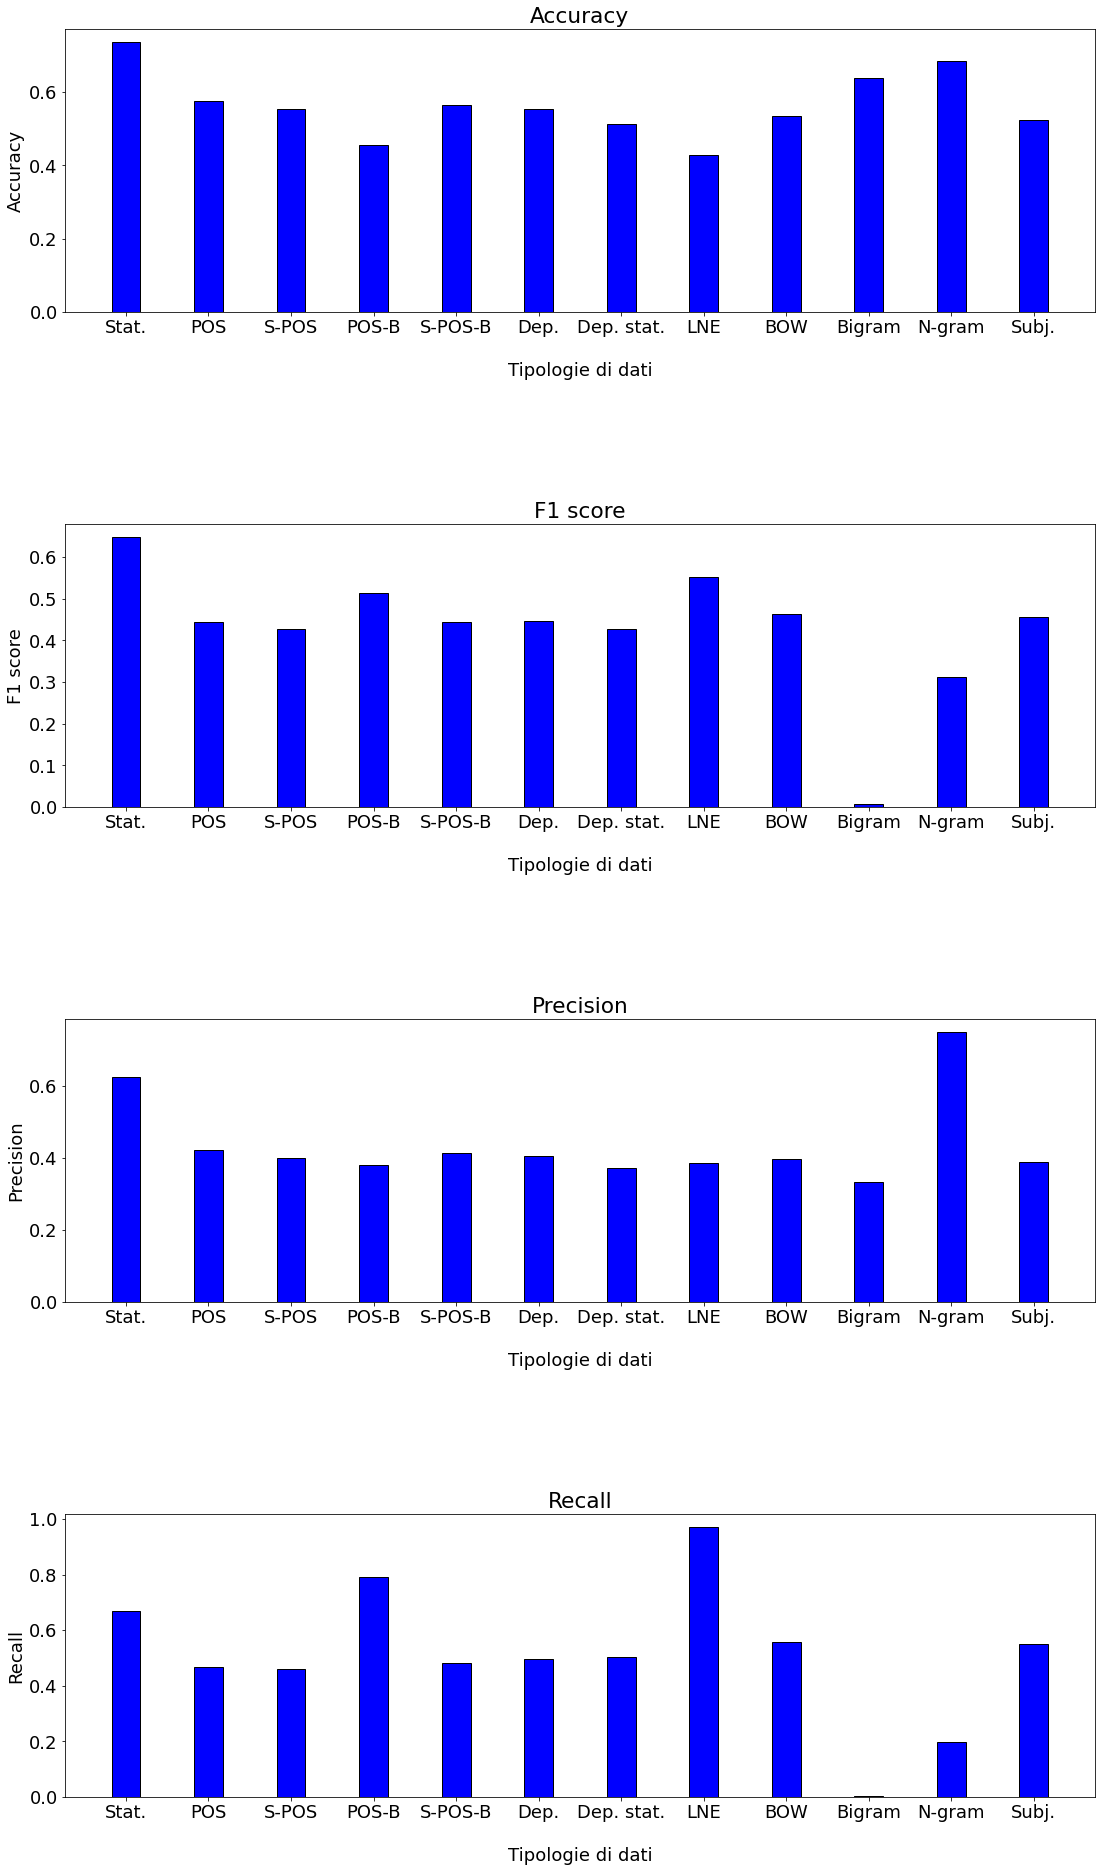

In [ ]:
# Draw the plots of the performance for the various dataset.

# Width of the bars for the graphs to draw.
barWidth = 0.35

# Plot the bar graphs.
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 30))
fig.tight_layout(pad=10.0)
data_names=["Stat.","POS","S-POS", "POS-B","S-POS-B","Dep.", "Dep. stat.","LNE","BOW","Bigram","N-gram","Subj."]
rows=["Accuracy","F1 score","Precision","Recall"]

for row,axis in zip(rows,axes.flatten()):
    axis.set_title(row)

    # Location of labels on the x axis.
    x_labels = np.arange(len(data_names))

    # Create the bars.
    axis.bar(x_labels, score[row], width = barWidth, color = 'blue', edgecolor = 'black', capsize=6)

    # Lable the axis.
    axis.set_xlabel("\nTipologie di dati")
    axis.set_xticks(x_labels)
    axis.set_xticklabels(data_names)
    axis.set_ylabel(row)

plt.show()  